#  import the packages to use in this project

In [87]:


import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

df = pd.read_csv(r'C:\Users\yemis\Downloads\movies.csv\movies.csv')

# looking at the data

In [58]:

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [59]:

df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing


In [60]:
for col in df.columns:
   pct_missing = np.mean(df[col].isnull())
   print('{}-----{}%'.format(col,pct_missing))

name-----0.0%
rating-----0.010041731872717789%
genre-----0.0%
year-----0.0%
released-----0.0002608242044861763%
score-----0.0003912363067292645%
votes-----0.0003912363067292645%
director-----0.0%
writer-----0.0003912363067292645%
star-----0.00013041210224308815%
country-----0.0003912363067292645%
budget-----0.2831246739697444%
gross-----0.02464788732394366%
company-----0.002217005738132499%
runtime-----0.0005216484089723526%


# Data Types for our columns

In [61]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [62]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [63]:
 df['releasedyearcountry']= df['released'].astype('str')
df['releasedyearcountry']

0          June 13, 1980 (United States)
1           July 2, 1980 (United States)
2          June 20, 1980 (United States)
3           July 2, 1980 (United States)
4          July 25, 1980 (United States)
                      ...               
7663    October 23, 2020 (United States)
7664    February 7, 2020 (United States)
7665           April 27, 2020 (Cameroon)
7666     October 1, 2020 (United States)
7667     August 19, 2020 (United States)
Name: releasedyearcountry, Length: 7668, dtype: object

In [64]:
df[['releaseddate','releasedcountry']] = df['releasedyearcountry'].str.split('(', expand = True)
df[['releaseddate','releasedcountry']]   

,releaseddate,releasedcountry
0,"June 13, 1980",United States)
1,"July 2, 1980",United States)
2,"June 20, 1980",United States)
3,"July 2, 1980",United States)
4,"July 25, 1980",United States)
...,...,...
7663,"October 23, 2020",United States)
7664,"February 7, 2020",United States)
7665,"April 27, 2020",Cameroon)
7666,"October 1, 2020",United States)


In [65]:
df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedyearcountry,releaseddate,releasedcountry
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980 (United States)","June 13, 1980",United States)
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980 (United States)","July 2, 1980",United States)
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980 (United States)","June 20, 1980",United States)


Cleaning this column df['releasedcountry']

In [66]:
df['releasedcountry']

0       United States)
1       United States)
2       United States)
3       United States)
4       United States)
             ...      
7663    United States)
7664    United States)
7665         Cameroon)
7666    United States)
7667    United States)
Name: releasedcountry, Length: 7668, dtype: object

In [67]:
df['releasedcountry']=df['releasedcountry'].str.replace(')',' ')
df['releasedcountry']

C:\Users\yemis\AppData\Local\Temp\ipykernel_4012\3560722656.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['releasedcountry']=df['releasedcountry'].str.replace(')',' ')


0       United States 
1       United States 
2       United States 
3       United States 
4       United States 
             ...      
7663    United States 
7664    United States 
7665         Cameroon 
7666    United States 
7667    United States 
Name: releasedcountry, Length: 7668, dtype: object

In [68]:
df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedyearcountry,releaseddate,releasedcountry
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980 (United States)","June 13, 1980",United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980 (United States)","July 2, 1980",United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980 (United States)","June 20, 1980",United States


split df['releaseddate']	column 

In [69]:
 df[['month','day','year_released',' ']] = df['releaseddate'].str.split(' ',expand=True)
    
df[['month','day','year_released',' ']]    

,month,day,year_released,
0,June,"13,",1980,
1,July,"2,",1980,
2,June,"20,",1980,
3,July,"2,",1980,
4,July,"25,",1980,
...,...,...,...,...
7663,October,"23,",2020,
7664,February,"7,",2020,
7665,April,"27,",2020,
7666,October,"1,",2020,


In [70]:
df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,...,gross,company,runtime,releasedyearcountry,releaseddate,releasedcountry,month,day,year_released,
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,...,46998772.0,Warner Bros.,146.0,"June 13, 1980 (United States)","June 13, 1980",United States,June,"13,",1980,
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,...,58853106.0,Columbia Pictures,104.0,"July 2, 1980 (United States)","July 2, 1980",United States,July,"2,",1980,
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,...,538375067.0,Lucasfilm,124.0,"June 20, 1980 (United States)","June 20, 1980",United States,June,"20,",1980,


DataFrame.drop(self, labels, axis, index, columns, level, inplace, errors)

drop unused columnsdf[['month','day','dummy']]    

In [71]:
df.drop(columns=['month','day',' ','releasedyearcountry','releaseddate' ] ) 

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedcountry,year_released
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,United States,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,United States,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,United States,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,United States,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,United States,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,United States,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,United States,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,Cameroon,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,United States,2020


In [72]:
df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,...,gross,company,runtime,releasedyearcountry,releaseddate,releasedcountry,month,day,year_released,
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,...,46998772.0,Warner Bros.,146.0,"June 13, 1980 (United States)","June 13, 1980",United States,June,"13,",1980,
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,...,58853106.0,Columbia Pictures,104.0,"July 2, 1980 (United States)","July 2, 1980",United States,July,"2,",1980,
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,...,538375067.0,Lucasfilm,124.0,"June 20, 1980 (United States)","June 20, 1980",United States,June,"20,",1980,


In [98]:
pd.set_option('display.max_rows',None )

In [73]:
df = df.sort_values(by='gross',inplace=False,ascending=False)

In [74]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,...,gross,company,runtime,releasedyearcountry,releaseddate,releasedcountry,month,day,year_released,
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,...,2.847246e+09,Twentieth Century Fox,162.0,"December 18, 2009 (United States)","December 18, 2009",United States,December,"18,",2009,
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,...,2.797501e+09,Marvel Studios,181.0,"April 26, 2019 (United States)","April 26, 2019",United States,April,"26,",2019,
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,...,2.201647e+09,Twentieth Century Fox,194.0,"December 19, 1997 (United States)","December 19, 1997",United States,December,"19,",1997,
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,...,2.069522e+09,Lucasfilm,138.0,"December 18, 2015 (United States)","December 18, 2015",United States,December,"18,",2015,
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,...,2.048360e+09,Marvel Studios,149.0,"April 27, 2018 (United States)","April 27, 2018",United States,April,"27,",2018,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,...,NaN,NaN,90.0,"October 23, 2020 (United States)","October 23, 2020",United States,October,"23,",2020,
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,...,NaN,Cactus Blue Entertainment,90.0,"February 7, 2020 (United States)","February 7, 2020",United States,February,"7,",2020,
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,...,NaN,Embi Productions,NaN,"April 27, 2020 (Cameroon)","April 27, 2020",Cameroon,April,"27,",2020,
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,...,NaN,NaN,120.0,"October 1, 2020 (United States)","October 1, 2020",United States,October,"1,",2020,


Check for duplicates in company

In [75]:
df['company'].sort_values(ascending = False)

7129                     thefyzz
5664                 micro_scope
6412    iDeal Partners Film Fund
4007                    i5 Films
6793                  i am OTHER
                  ...           
5728                         NaN
5730                         NaN
7662                         NaN
7663                         NaN
7666                         NaN
Name: company, Length: 7668, dtype: object

Drop for duplicates in company

In [76]:
df['company'].sort_values(ascending = False).drop_duplicates()

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
7657                                    NaN
Name: company, Length: 2386, dtype: object

Checking the correlation between budget and gross

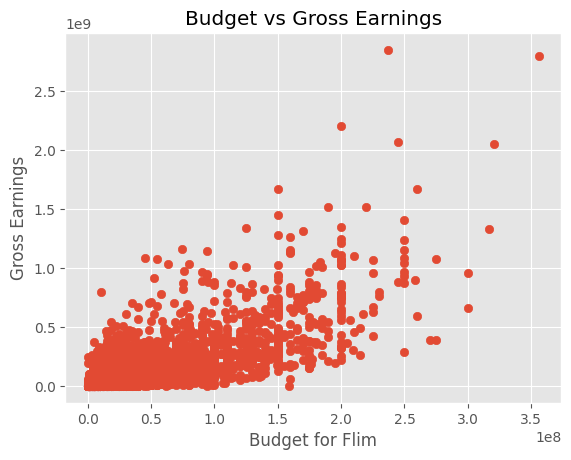

In [77]:
plt.scatter(x= df['budget'], y=df['gross'])
plt.xlabel('Budget for Flim') 
plt.ylabel('Gross Earnings') 
  

plt.title("Budget vs Gross Earnings")
plt.show()

<AxesSubplot: xlabel='budget', ylabel='gross'>

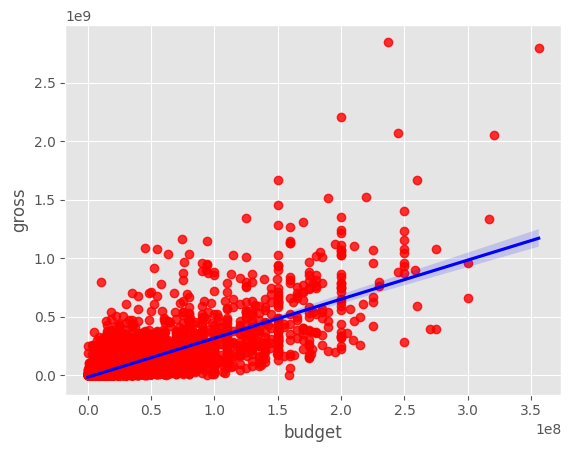

In [78]:
sns.regplot(x= df['budget'], y=df['gross'],line_kws={'color':'blue'},scatter_kws={'color':'red'})

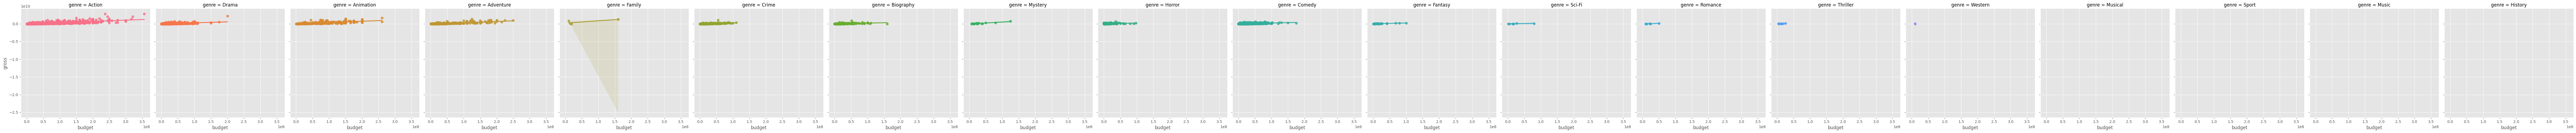

In [79]:
sns.lmplot(x= 'budget', y='gross',data=df,hue = 'genre',col='genre')

In [80]:
df.head(3)


,name,rating,genre,year,released,score,votes,director,writer,star,...,gross,company,runtime,releasedyearcountry,releaseddate,releasedcountry,month,day,year_released,
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,...,2.847246e+09,Twentieth Century Fox,162.0,"December 18, 2009 (United States)","December 18, 2009",United States,December,"18,",2009,
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,...,2.797501e+09,Marvel Studios,181.0,"April 26, 2019 (United States)","April 26, 2019",United States,April,"26,",2019,
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,...,2.201647e+09,Twentieth Century Fox,194.0,"December 19, 1997 (United States)","December 19, 1997",United States,December,"19,",1997,


Looking at correlations

In [81]:
df.corr()

C:\Users\yemis\AppData\Local\Temp\ipykernel_4012\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


Visualizing the correlation matrix

C:\Users\yemis\AppData\Local\Temp\ipykernel_4012\2398845996.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


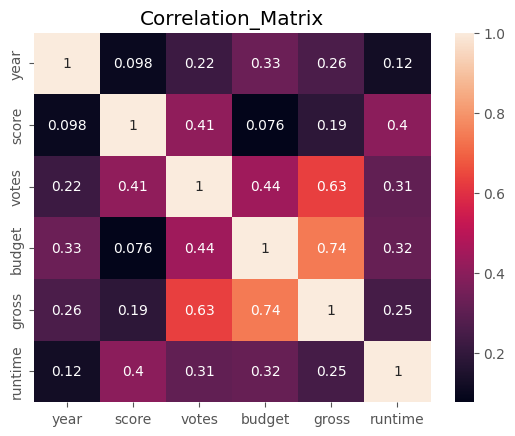

In [82]:

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation_Matrix')
plt.show()

There is a high correlation between budget and gross 
And also between gross and votes

Converting categorical colunms to numeric columns

In [83]:
df_numeric=df

for col_name in df_numeric.columns:
    if(df_numeric[col_name].dtype=='object'):
        df_numeric[col_name]= df_numeric[col_name].astype('category')
        df_numeric[col_name]= df_numeric[col_name].cat.codes
        
df_numeric    
        
    

,name,rating,genre,year,released,score,votes,director,writer,star,...,gross,company,runtime,releasedyearcountry,releaseddate,releasedcountry,month,day,year_released,
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,...,2.847246e+09,2253,162.0,696,610,56,10,10,30,0
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,...,2.797501e+09,1606,181.0,183,153,56,8,34,40,0
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,...,2.201647e+09,2253,194.0,704,616,56,10,11,18,0
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,...,2.069522e+09,1540,138.0,698,612,56,10,10,36,0
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,...,2.048360e+09,1606,149.0,192,161,56,8,35,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18.0,1500,2289,2421,...,NaN,-1,90.0,2964,2582,56,18,31,41,0
7664,1678,-1,4,2020,1107,4.7,36.0,774,2614,1886,...,NaN,539,90.0,1107,975,56,11,44,41,0
7665,4717,-1,6,2020,193,5.7,29.0,2061,2683,2040,...,NaN,941,NaN,193,162,8,8,35,41,0
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,...,NaN,-1,120.0,2817,2462,56,18,1,41,0


In [93]:

df_numeric.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,...,gross,company,runtime,releasedyearcountry,releaseddate,releasedcountry,month,day,year_released,
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,...,0.005533,0.009211,0.010392,-0.010480,-0.010398,-0.001968,-0.011725,0.009435,0.009491,-0.010007
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,...,-0.107339,-0.032943,0.062145,0.017208,0.016326,0.023977,0.013475,0.022557,0.004727,-0.013615
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,...,-0.235650,-0.071067,-0.052711,0.030429,0.029641,-0.091572,0.028397,-0.004435,-0.082180,-0.057143
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,...,0.257486,-0.010431,0.120811,0.000077,-0.000066,-0.089289,-0.001562,0.011348,0.991945,0.080952
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,...,0.001659,-0.010474,0.000868,0.998458,0.998400,-0.044096,0.993694,0.107580,-0.001415,0.027332
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,...,0.186258,0.001030,0.399451,0.042148,0.042284,-0.092763,0.040993,-0.003257,0.105333,-0.005186
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,...,0.630757,0.133204,0.309212,0.016154,0.017168,0.092014,0.017337,-0.008481,0.219952,0.042474
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,...,-0.014441,0.004404,0.017624,-0.001526,-0.001323,0.013331,-0.000105,-0.005989,-0.018550,0.012035
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,...,-0.023519,0.005646,-0.003511,-0.002784,-0.002798,-0.001201,-0.002892,0.001654,-0.006086,0.012012
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,...,-0.002717,0.012442,0.010174,0.015805,0.015626,-0.023540,0.015406,0.015715,-0.025242,0.017881


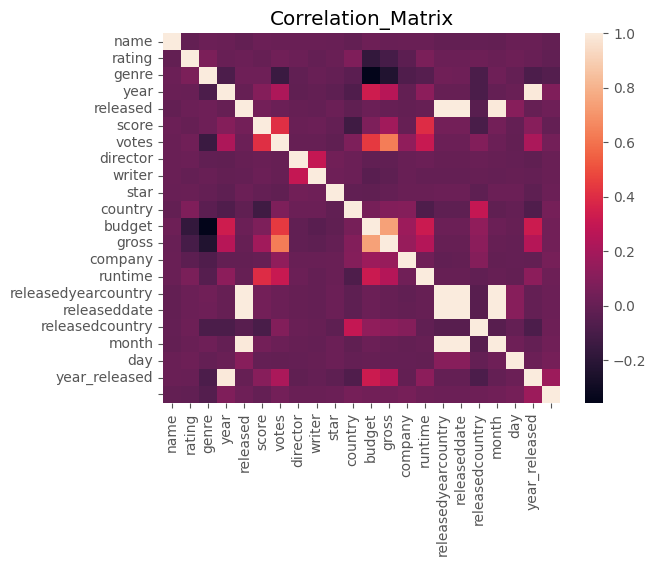

In [85]:



correlation_mat = df_numeric.corr()
sns.heatmap(correlation_mat)
plt.title('Correlation_Matrix')
plt.show()

In [102]:
df_numeric.corr().unstack()

name                 name                   1.000000
                     rating                -0.008069
                     genre                  0.016355
                     year                   0.011453
                     released              -0.011311
                     score                  0.017097
                     votes                  0.013088
                     director               0.009079
                     writer                 0.009081
                     star                   0.006472
                     country               -0.010737
                     budget                 0.023970
                     gross                  0.005533
                     company                0.009211
                     runtime                0.010392
                     releasedyearcountry   -0.010480
                     releaseddate          -0.010398
                     releasedcountry       -0.001968
                     month                 -0.

In [106]:
corr_pairs = df_numeric.corr().unstack()
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre                budget                -0.356564
budget               genre                 -0.356564
genre                gross                 -0.235650
gross                genre                 -0.235650
rating               budget                -0.176002
budget               rating                -0.176002
votes                genre                 -0.145307
genre                votes                 -0.145307
score                country               -0.133348
country              score                 -0.133348
gross                rating                -0.107339
rating               gross                 -0.107339
releasedcountry      score                 -0.092763
score                releasedcountry       -0.092763
genre                releasedcountry       -0.091572
releasedcountry      genre                 -0.091572
year                 releasedcountry       -0.089289
releasedcountry      year                  -0.089289
                     year_released         -0.

In [112]:
high_corrolation =sorted_pairs[(sorted_pairs)>0.5] 
high_corrolation

votes                gross                  0.630757
gross                votes                  0.630757
                     budget                 0.740395
budget               gross                  0.740395
year_released        year                   0.991945
year                 year_released          0.991945
released             month                  0.993694
month                released               0.993694
releasedyearcountry  month                  0.995320
month                releasedyearcountry    0.995320
releaseddate         month                  0.995551
month                releaseddate           0.995551
released             releaseddate           0.998400
releaseddate         released               0.998400
releasedyearcountry  released               0.998458
released             releasedyearcountry    0.998458
releaseddate         releasedyearcountry    0.999912
releasedyearcountry  releaseddate           0.999912
name                 name                   1.